<img src="https://image.freepik.com/free-photo/wine-composition-dark-rustic-background-flat-lay_141291-201.jpg" width="1200" height="500">


# Modeling Price

In this notebook, we fit a simple **`  Linear Regression Classifier  `** to **AirBnB** prices for rentals in the Boston market.
<br>[Source:](https://www.kaggle.com/residentmario/d/airbnb/boston/)

We're running a **simple model** that can hopefully give us more insight into **what variables matter** and **which ones don't** when it comes to AirBnB rentals. **Just that's all...**
That our **main purpose** is not to write **a very sensitive classifier** of rental prices about AirBnB.

**`  Linear Regression Classification  `** is **ideal** for this process. Let's get started.


## Notebook of Contents
1. [Installation](#1)   
2. [Project Motivation](#2) 
3. [File Descriptions](#3)
4. [Results](#4)
5. [Source, Licensing, Authors, and Acknowledgements](#5)
6. [Conclusion](#6)


---
<p style="text-align: center;"><span style="font-size: 70px; color: #D7D1C9;">&#8912;&#8901;&#8913;</span><em></em></p>

<a id="1"></a>
# 1. Installation
In this notebook uses **Python 3**, along with **Jupyter Notebook**. The following libraries are necessary for running the notebook:

- Numpy
- Pandas
- MatplotLib
- Scikit-Learn
- Seaborn

In [2]:
# Let's loading dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Let's loading dataset
#wine = pd.read_csv('../input/winequality-red.csv')
wine = pd.read_csv(r'D:\DS_Document\Data_Sample\UCI-WineQualıty\WineQuality-RedWine.csv', sep=',')

In [7]:
# Let's check how the data is distributed
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


***
### Renaming Columns
I want to replace the spaces in the column labels with underscores `  _  ` to be able to reference columns with dot notation.<br>There are many ways to do this. Here's first way you could've done it.


In [8]:
# Renaming Columns: Method 1

new_wine_M1 = wine.rename(columns={'fixed acidity': 'fixed_acidity',
                                       'volatile acidity': 'volatile_acidity',
                                       'citric acid': 'citric_acid',
                                       'residual sugar': 'residual_sugar',
                                       'free sulfur dioxide': 'free_sulfur_dioxide',
                                       'total sulfur dioxide': 'total_sulfur_dioxide'
                                      }
                             )
new_wine_M1.head(1)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


You can avoid making naming errors due to **typos** caused by manual typing. That time here's another one way you could've done it.

In [9]:
# Renaming Columns: Method 2

new_wine_M2 = wine.copy()
labels = list(wine.columns)
labels[0] = labels[0].replace(' ', '_')
labels[1] = labels[1].replace(' ', '_')
labels[2] = labels[2].replace(' ', '_')
labels[3] = labels[3].replace(' ', '_')
labels[5] = labels[5].replace(' ', '_')
labels[6] = labels[6].replace(' ', '_')
new_wine_M2.columns = labels

new_wine_M2.head(1)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


So what should we do if **the number of columns is higher**? Of course we need `  for  ` loop.

In [10]:
# Renaming Columns: Method 3

new_wine_M3 = wine.copy()
for i in range(len(list(new_wine_M3.columns))):
    labels[i] = labels[i].replace(' ', '_')
new_wine_M3.columns = labels

new_wine_M3.head(1)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Here is a more **effective** code. This code is **readable**, **simple**, **useful** and **more effective**, right?

In [11]:
# Renaming Columns: Method 4 Finally

wine.columns = [label.replace(' ', '_') for label in wine.columns]
wine.head(5)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Overview of Data

In [12]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [13]:
wine.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

When the above results are examined, it is seen that there is missing value in the data set.
Yukarıdaki sonuçlar incelendiğinde, veri setinde eksik verinin olmadığı görülmektedir.
<br>
<br>
Let's find out how many different **levels of quality** are there?

In [14]:
#  levels of quality

print("Levels of Quality:",sorted(list(wine['quality'].unique())))

Levels of Quality: [3, 4, 5, 6, 7, 8]


Let's now find out **distributions of quality level**?

In [15]:
# Distributions of quality level

quality_level_count = wine['quality'].value_counts().sort_index()
quality_level_count = pd.DataFrame(quality_level_count).reset_index()
quality_level_count.rename(columns={'quality':'Count','index':'Level of Quality'}, inplace = True)
quality_level_count

,Level of Quality,Count
0,3,10
1,4,53
2,5,681
3,6,638
4,7,199
5,8,18


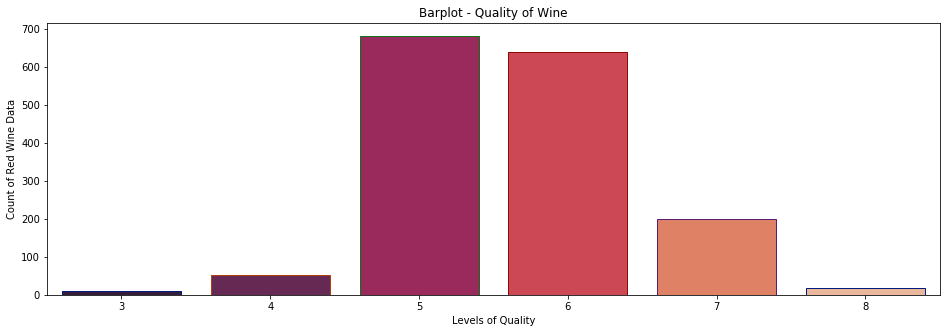

In [16]:
# Plotting quality of wine

fig = plt.figure(figsize=(16, 5))
#sns.countplot(x='quality', data=wine, color=Blue, palette="rocket")
sns.countplot(x='quality', data=wine, palette="rocket", edgecolor=sns.color_palette("dark", 5))

plt.title("Barplot - Quality of Wine")
plt.xlabel("Levels of Quality")
plt.ylabel("Count of Red Wine Data");

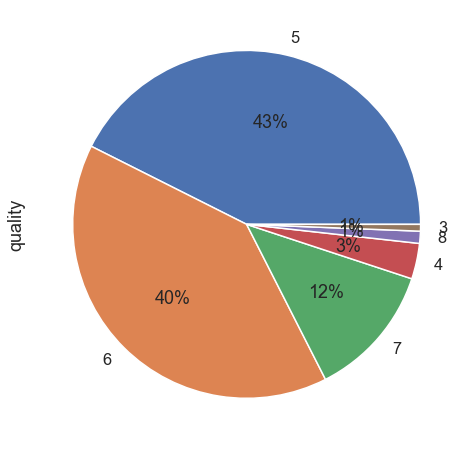

In [47]:
#kalite puanlarını pie grafikle gösterelim
plt.figure(1, figsize=(8,8))
level_count = wine['quality'].value_counts()
level_count.plot.pie(autopct="%1.0f%%");

## Technical Evaluation About Data Series
1. The dataset contains a total of 1599 examples with 12 columns.
2. There is not missing value in the data set.
3. All features in the data set contain numerical values
4. In this data set, five different quality levels have been determined for wines; `  3, 4, 5, 6, 7, 8  `
5. The lowest value is `  3  ` and the highest value is `  8  `.

### Tanımlayıcı İstatistik(Descriptive Statistics)

Descriptive statistics perform quantitative identification, summarization or analysis of features in the dataset.

Tanımlayıcı istatistik, veri kümesindeki özelliklerin kantitatif tanımlamasını, özetlemesini veya analizini yapar. Çıkarımsal istatistik, veri setini temsil edecek örnek kümesini öğrenmeye çalışırken, tanımlayıcı istatistik tüm örnekleri özetlemeye çalışır.

Merkezi eğilim ve değişkenlik ya da dağılım ölçüleri, veri setini tanımlamak için yaygın olarak kullanılan bazı ölçülerdir . Merkezi eğilimi tanımlamak için kullanılan ölçüler ortalama, medyan ve moddur. Değişkenliği tanımlamak için kullanılan ölçüler ise standart sapma(veya varyans), değişkenlerin minimum ve maksimum değerleri, basıklık ve çarpıklıktır

In [50]:
wine.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed_acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile_acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric_acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual_sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free_sulfur_dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total_sulfur_dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


Yukarıdaki tabloda veri setindeki tüm özelliklere ait tanımlayıcı istatistik sonuçları yer almaktadır. Tabloda özelliklere ait hesaplamalar varsa da bunların çıktı değişkeni olan kaliteyle ilişiğini kurabilme olanağımız yoktur. Bunun için tabloyu kendi isteğimize göre elde edelim: Özelliklerden bazılarını alalım ve kalite seviyelerine göre tanımlayıcı istatistik bilgilerini elde edelim.

In [20]:
def levels(column):

    if column in (3, 4):
        return 'Level 3-4'
    elif column in (5, 6):
        return 'Level 5-6'
    else:
        return 'Level 7-8'

wine["level_quality"] = wine["quality"].apply(levels)

Yukarıdaki istatistiksel tabloya göre yapılabilecek bazı yorumlar:

- Ortalama alkol değeri kalite seviyesi arttıça, çok az da olsa, artmaktadır.
- Ortalama volatile acidity değeri kalite seviyesi arttıkça azalmaktadır.
- Ortalama sulphates değeri kalite seviyesi arttıkça azalmaktadır.
- Ortalama residual sugar ve total sulfur dioxide değerlerinin kalite seviyesine göre farklılıkları olmakla beraber kalite seviyesiyle artan veya azalan bir ilişkiye sahip değiller.

In [21]:
sel_features=['residual_sugar', 'total_sulfur_dioxide', 'sulphates',
                   'alcohol', 'volatile_acidity', 'quality','level_quality']
wine_sel_features = wine[sel_features]
sel_features.pop();

In [53]:
for name, group in wine_sel_features.groupby('level_quality'):
    display(name, round(group.describe()[sel_features].T,1))

'Level 3-4'

,count,mean,std,min,25%,50%,75%,max
residual_sugar,63.0,2.7,1.7,1.2,1.9,2.1,3.0,12.9
total_sulfur_dioxide,63.0,34.4,26.4,7.0,13.5,26.0,48.0,119.0
sulphates,63.0,0.6,0.2,0.3,0.5,0.6,0.6,2.0
alcohol,63.0,10.2,0.9,8.4,9.6,10.0,11.0,13.1
volatile_acidity,63.0,0.7,0.2,0.2,0.6,0.7,0.9,1.6
quality,63.0,3.8,0.4,3.0,4.0,4.0,4.0,4.0


'Level 5-6'

,count,mean,std,min,25%,50%,75%,max
residual_sugar,1319.0,2.5,1.4,0.9,1.9,2.2,2.6,15.5
total_sulfur_dioxide,1319.0,48.9,32.7,6.0,24.0,40.0,65.0,165.0
sulphates,1319.0,0.6,0.2,0.4,0.5,0.6,0.7,2.0
alcohol,1319.0,10.3,1.0,8.4,9.5,10.0,10.9,14.9
volatile_acidity,1319.0,0.5,0.2,0.2,0.4,0.5,0.6,1.3
quality,1319.0,5.5,0.5,5.0,5.0,5.0,6.0,6.0


'Level 7-8'

,count,mean,std,min,25%,50%,75%,max
residual_sugar,217.0,2.7,1.4,1.2,2.0,2.3,2.7,8.9
total_sulfur_dioxide,217.0,34.9,32.6,7.0,17.0,27.0,43.0,289.0
sulphates,217.0,0.7,0.1,0.4,0.6,0.7,0.8,1.4
alcohol,217.0,11.5,1.0,9.2,10.8,11.6,12.2,14.0
volatile_acidity,217.0,0.4,0.1,0.1,0.3,0.4,0.5,0.9
quality,217.0,7.1,0.3,7.0,7.0,7.0,7.0,8.0


In [63]:
wine.pivot_table("Total Bags", index =["level_quality"], columns="alcohol", aggfunc = 'mean')

#df_just_groupby = df.groupby(['Col_1','Col_2'])    # Diger column lar ilk dolu degeri alir.
#df_just_groupby.first()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
level_quality,,,,,,,,,,,,
Level 3-4,7.4,0.59,0.08,4.4,0.086,6.0,29.0,0.9974,3.38,0.50,9.0,4
Level 5-6,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
Level 7-8,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7


In [99]:
wine_q= wine.pivot_table("alcohol", index =["level_quality"], aggfunc = ('mean','count'))

In [104]:
wine_q = wine_q.reset_index()
wine_q

,index,level_quality,count,mean
0,0,Level 3-4,63,10.215873
1,1,Level 5-6,1319,10.252717
2,2,Level 7-8,217,11.518049


In [106]:
wine_q['mean']

0    10.215873
1    10.252717
2    11.518049
Name: mean, dtype: float64

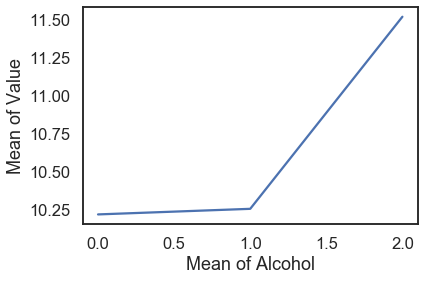

<Figure size 1152x360 with 0 Axes>

In [124]:
fig, axs = plt.subplots(1, 1)
fig = plt.figure(figsize=(16, 5))

axs.plot(wine_q['mean'])
#axs.plot(wine_q['count'])
axs.set_xlabel('Mean of Alcohol')
axs.set_ylabel('Mean of Value')
#axs.legend(['Mean of Alcohol','Count'])
#plt.title("Barplot - Quality of Wine")
#plt.xlabel("Levels of Quality")
#plt.ylabel("Count of Red Wine Data")
#fig.tight_layout()
plt.show()

In [ ]:
fig, axs = plt.subplots(2, 1)
axs[0].plot(t, s1, t, s2)
axs[0].set_xlim(0, 2)
axs[0].set_xlabel('time')
axs[0].set_ylabel('s1 and s2')
axs[0].grid(True)

cxy, f = axs[1].cohere(s1, s2, 256, 1. / dt)
axs[1].set_ylabel('coherence')

fig.tight_layout()
plt.show()

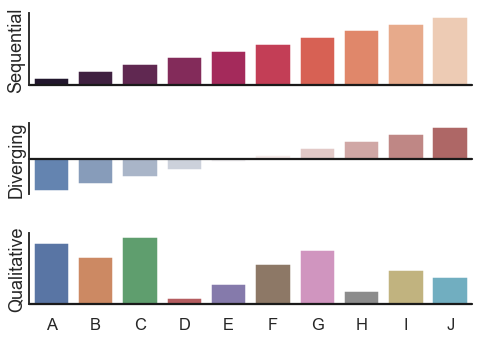

In [23]:
"""
Color palette choices
=====================

"""
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", context="talk")
rs = np.random.RandomState(8)

# Set up the matplotlib figure
f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(7, 5), sharex=True)

# Generate some sequential data
x = np.array(list("ABCDEFGHIJ"))
y1 = np.arange(1, 11)
sns.barplot(x=x, y=y1, palette="rocket", ax=ax1)
ax1.axhline(0, color="k", clip_on=False)
ax1.set_ylabel("Sequential")

# Center the data to make it diverging
y2 = y1 - 5.5
sns.barplot(x=x, y=y2, palette="vlag", ax=ax2)
ax2.axhline(0, color="k", clip_on=False)
ax2.set_ylabel("Diverging")

# Randomly reorder the data to make it qualitative
y3 = rs.choice(y1, len(y1), replace=False)
sns.barplot(x=x, y=y3, palette="deep", ax=ax3)
ax3.axhline(0, color="k", clip_on=False)
ax3.set_ylabel("Qualitative")

# Finalize the plot
sns.despine(bottom=True)
plt.setp(f.axes, yticks=[])
plt.tight_layout(h_pad=2)

---
<p style="text-align: center;"><span style="font-size: 70px; color: #D7D1C9;">&#8912;&#8901;&#8901;&#8913;</span><em></em></p>

<a id="2"></a>
# 2. Project Motivation

---
<p style="text-align: center;"><span style="font-size: 70px; color: #D7D1C9;">&#8912;&#8901;&#8901;&#8901;&#8913;</span><em></em></p>

<a id="3"></a>
# 3. File Descriptions

---
<p style="text-align: center;"><span style="font-size: 70px; color: #D7D1C9;">&#8912;&#8901;&#8901;&#8901;&#8901;&#8913;</span><em></em></p>

<a id="4"></a>
# 4. Results

---
<p style="text-align: center;"><span style="font-size: 70px; color: #D7D1C9;">&#8912;&#8901;&#8901;&#8901;&#8901;&#8901;&#8913;</span><em></em></p>

<a id="5"></a>
# 5. Source, Licensing, Authors, and Acknowledgements

[Source:](https://www.kaggle.com/residentmario/d/airbnb/boston/)

---
<p style="text-align: center;"><span style="font-size: 70px; color: #D7D1C9;">&#8912;&#8901;&#8901;&#8901;&#8901;&#8901;&#8901;&#8913;</span><em></em></p>

<a id="6"></a>
# 6. Conclusion

Conclusion...

---
<p style="text-align: center;"><span style="font-size: 70px; color: #D7D1C9;">&#8912;&#8942;&#8913;</span><em></em></p>

&#8901;

---
<p style="text-align: center;"><span style="font-size: 100px; color: #999999;">⋈</span><em></em></p>